# MNIST Fashion Dataset Neural Networks Model
## Munsif Raza

In [1]:
#Importing Libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Dataset
We shall use MNIST fashion dataset.
This dataset includes 60,000 images for training and 10,000 images for validation.

In [2]:
# Laoding dataset
fashion_mnist = keras.datasets.fashion_mnist
#spliting data into training and testing data.
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 2s 0us/step


In [3]:
# Let's have a look on data
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


What this tells is that we have 60,000 Training images and 10,000 testing images. Each image is of 28*28 pixels.

In [4]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

This shows we have labels between 0 to 9. Each integer represents an specific article of clothing.

In [5]:
# Let's assign name to each article
class_names = ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

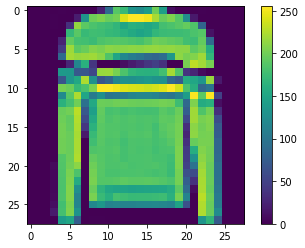

In [15]:
# Let's look some of these images.
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

Great!! Looks like a shirt it is.

# Data Preprocessing
Data preprocessing is done to make our data model usable. Here as we know it a greyscale pixeled image means we shall have values between 0 to 255. We shall convert all those values between 0 and 1. Because smaller the values easier and efficient training we shall have.

In [16]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Building the Model
Now it's time to build the model. We shall use Keras Sequential model with three different layers.

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #input layer(1)
    keras.layers.Dense(128, activation='relu'), #hidden layer(2)
    keras.layers.Dense(10, activation='softmax') #output layer(3)
])

### Layer 1:
This is input layer which has 784 neurons considering the fact that one image is 28*28 pixels. We have Flattened all those values from matrix to row matrix.
### Layer  2:
It is hidden layer having 128 neurons and using relu activation function.
### Layer 3:
This is output layer having ten neurons. Because we have tens classes of end result. Softmax is the activation function that ensures sum of all output neurons should be equal to 1. And shall predict using probability distribution.

# Compile the Model
Last step in making model is to define the loss function, optimizer, and metrics we would like to track.

In [19]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Training the Model
Now when we are done with model building. We shall train our model now.

In [22]:
model.fit(train_images, train_labels, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2304 - accuracy: 0.9142
Epoch 2/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2230 - accuracy: 0.9170
Epoch 3/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2156 - accuracy: 0.9193
Epoch 4/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2114 - accuracy: 0.9198
Epoch 5/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2050 - accuracy: 0.9227
Epoch 6/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2000 - accuracy: 0.9253
Epoch 7/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1933 - accuracy: 0.9279
Epoch 8/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1872 - accuracy: 0.9292


# Evaluating the Model
When training is done here we shall evaluate our model using testing data.

In [23]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=1)
print('Test Accuracy: ' , test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3343 - accuracy: 0.8907
Test Accuracy:  0.8906999826431274


# Making Predictions
We shall make predictions using new data to the model.

In [24]:
predictions = model.predict(test_images)

In [26]:
# We have an array of predictions for each testing image to let's see one of it.
predictions[0]

array([4.09865086e-10, 7.04364345e-10, 1.14095755e-11, 2.94797363e-13,
       9.95541080e-11, 3.26057343e-04, 2.43921910e-10, 2.04445748e-03,
       4.31307177e-11, 9.97629464e-01], dtype=float32)

In [27]:
# We are getting here array of Probability distribution let's see which class is this.
print(np.argmax(predictions[0]))

9


In [28]:
# Let's see what's that in classes
print(class_names[np.argmax(predictions[0])])

Ankle boot


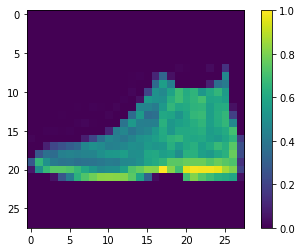

In [29]:
# Let's see is it really an ankle boot in testing data.
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

# Conclusion:
We made a model using Neural networks. Fitted it with MNIST Fashion dataset. In which we got 89% accuracy rate model. Then finally we evaluated the model and made successful prediction.